In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

from models.wimp import SIWIMP
from models.wimp import SIWIMP_Helm
from detectors.nai import DAMA
from veldists import VelDist

In [6]:
## Step 1
Det = DAMA()
Model = SIWIMP()
Model2 = SIWIMP_Helm()
Dist = VelDist("modgSHM",0.3)

In [7]:
## Step 2
mX = 7.8E9 # eV
sig = 2*1.8E-40 # cm2   ## Extra factor of 2 is to get from sigma_p (reported in my thesis) and sigma_N (what is assumed for this calc)
def DMRate(T,E):
    return Model.dRdER(T,mX,E,sig,Dist)

def DMRate2(T,E):
    return Model2.dRdER(T,mX,E,sig/2,Dist) ## remove factor of 2 as we input sigma_p directly.

/Users/madeleinezurowski/Documents/sensitivity_dev/sgm/detector.py:101: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = integrate.quad(lambda E2: self.dRdE_True(Model,E2)*self.Res(E,E2),0,2*self.Emax(),points=self.ROI(),limit=int(1E8))[0] ## this integral could probs be optimised
/Users/madeleinezurowski/Documents/sensitivity_dev/sgm/detector.py:101: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral = integrate.quad(lambda E2: self.dRdE_True(Model,E2)*self.Res(E,E2),0,2*self.Emax(),points=self.ROI(),limit=int(1E8))[0] ## this integral could probs be optimised


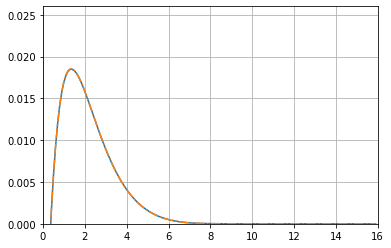

In [8]:
## Step 3
E = np.arange(0,16,0.1)
plt.plot(E,[Det.dRdE(DMRate,e)*23/(127+23) for e in E])
plt.plot(E,[Det.dRdE(DMRate2,e)*23/(127+23) for e in E],"-.")
plt.xlim(0,16)
plt.ylim(0,0.026)
plt.grid()
plt.show()